In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df_2020_2021 = pd.read_csv('combined_2020_2021.csv')
df_2021_2022 = pd.read_csv('combined_2021_2022.csv')

In [2]:
# List of all-star players for the 2020-2021 NBA season
allstar_players_2020_2021 = [
    "Kevin Durant", "Giannis Antetokounmpo", "Bradley Beal", "Kyrie Irving",
    "Joel Embiid", "James Harden", "Jayson Tatum", "Jaylen Brown",
    "Zach LaVine", "Julius Randle", "Ben Simmons", "Nikola Vučević",
    "LeBron James", "Stephen Curry", "Luka Dončić", "Kawhi Leonard",
    "Nikola Jokić", "Damian Lillard", "Chris Paul", "Paul George",
    "Donovan Mitchell", "Rudy Gobert", "Anthony Davis", "Zion Williamson"
]

# Adding an "allstar" column to the dataframe
df_2020_2021['allstar'] = df_2020_2021['Player'].apply(lambda x: x in allstar_players_2020_2021)


In [3]:
# Team records for the 2020-2021 NBA season (72 games)
team_records = {
   "Philadelphia 76ers": (49, 23),
    "Brooklyn Nets": (48, 24),
    "Milwaukee Bucks": (46, 26),
    "New York Knicks": (41, 31),
    "Atlanta Hawks": (41, 31),
    "Miami Heat": (40, 32),
    "Boston Celtics": (36, 36),
    "Washington Wizards": (34, 38),
    "Indiana Pacers": (34, 38),
    "Charlotte Hornets": (33, 39),
    "Chicago Bulls": (31, 41),
    "Toronto Raptors": (27, 45),
    "Cleveland Cavaliers": (22, 50),
    "Orlando Magic": (21, 51),
    "Detroit Pistons": (20, 52),
    "Utah Jazz": (52, 20),
    "Phoenix Suns": (51, 21),
    "Denver Nuggets": (47, 25),
    "Los Angeles Clippers": (47, 25),
    "Dallas Mavericks": (42, 30),
    "Portland Trail Blazers": (42, 30),
    "Los Angeles Lakers": (42, 30),
    "Golden State Warriors": (39, 33),
    "Memphis Grizzlies": (38, 34),
    "San Antonio Spurs": (33, 39),
    "New Orleans Pelicans": (31, 41),
    "Sacramento Kings": (31, 41),
    "Minnesota Timberwolves": (23, 49),
    "Oklahoma City Thunder": (22, 50),
    "Houston Rockets": (17, 55)
}

# Mapping of dataset team abbreviations to the team names used in win records
team_abbreviation_mapping = {
    "ATL": "Atlanta Hawks",
    "BOS": "Boston Celtics",
    "BRK": "Brooklyn Nets",
    "CHI": "Chicago Bulls",
    "CHO": "Charlotte Hornets",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHO": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards"
}

# Calculating projected wins for an 82-game season
projected_wins_82_games = {team: round((wins / 72) * 82) for team, (wins, _) in team_records.items()}

# Updating the 'Tm' column in the dataset to use the team names
df_2020_2021['Tm'] = df_2020_2021['Tm'].replace(team_abbreviation_mapping)

# Updating the 'Wins' column using the projected wins
df_2020_2021['Wins'] = df_2020_2021['Tm'].map(projected_wins_82_games)

In [4]:
team_wins_dict_2021_2022 = {
    'Miami Heat': 53,
    'Boston Celtics': 51,
    'Milwaukee Bucks': 51,
    'Philadelphia 76ers': 51,
    'Toronto Raptors': 48,
    'Chicago Bulls': 46,
    'Brooklyn Nets': 44,
    'Cleveland Cavaliers': 44,
    'Atlanta Hawks': 43,
    'Charlotte Hornets': 43,
    'New York Knicks': 37,
    'Washington Wizards': 35,
    'Indiana Pacers': 25,
    'Detroit Pistons': 23,
    'Orlando Magic': 22,
    'Phoenix Suns': 64,
    'Memphis Grizzlies': 56,
    'Golden State Warriors': 53,
    'Dallas Mavericks': 52,
    'Utah Jazz': 49,
    'Denver Nuggets': 48,
    'Minnesota Timberwolves': 46,
    'Los Angeles Clippers': 42,
    'New Orleans Pelicans': 36,
    'San Antonio Spurs': 34,
    'Los Angeles Lakers': 33,
    'Sacramento Kings': 30,
    'Portland Trail Blazers': 27,
    'Oklahoma City Thunder': 24,
    'Houston Rockets': 20
}


# Calculating projected wins for an 82-game season
wins_2021_2022 = {team: wins for team, (wins) in team_wins_dict_2021_2022.items()}

# Updating the 'Tm' column in the dataset to use the team names
df_2021_2022['Tm'] = df_2021_2022['Tm'].replace(team_abbreviation_mapping)

# Updating the 'Wins' column using the projected wins
df_2021_2022['Wins'] = df_2021_2022['Tm'].map(wins_2021_2022)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
features = df_2020_2021.drop(columns=['Player', 'allstar', 'Tm'])
target = df_2020_2021['allstar']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluating the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Extracting feature importances from the model
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying the most and least important features
most_important_features = feature_importance_df.head()
least_important_features = feature_importance_df.tail()

print(f"Most important features: {most_important_features}")
print(f"Least important features: {least_important_features}")
      

print(accuracy)


Most important features:    Feature  Importance
19     BPM    0.108562
20    VORP    0.088141
17    OBPM    0.086781
21      FG    0.079265
42     PTS    0.078255
Least important features:    Feature  Importance
23     FG%    0.003270
11    TOV%    0.003195
7     TRB%    0.001780
36     TRB    0.001686
10    BLK%    0.001321
0.9814814814814815


In [6]:
# Preparing the 2021-2022 data for prediction
# Ensure the data has the same columns as the training data
df_2021_2022_features = df_2021_2022[features.columns]

# Standardizing the 2021-2022 data using the same scaler as the training data
df_2021_2022_scaled = scaler.transform(df_2021_2022_features)

# Predicting all-star players for the 2021-2022 season
predicted_allstars = model.predict(df_2021_2022_scaled)

# Adding the prediction to the 2021-2022 dataframe
df_2021_2022['predicted_allstar'] = predicted_allstars

# Displaying the players predicted as all-stars
predicted_allstars_df = df_2021_2022[df_2021_2022['predicted_allstar'] == True]
predicted_allstars_df[['Player', 'predicted_allstar']]


,Player,predicted_allstar
11,Giannis Antetokounmpo,True
58,Devin Booker,True
125,Stephen Curry,True
133,DeMar DeRozan,True
140,Luka Dončić,True
153,Kevin Durant,True
161,Joel Embiid,True
194,Rudy Gobert,True
273,LeBron James,True
289,Nikola Jokić,True


In [7]:
# Actual all-star players for the 2021-2022 NBA season
actual_allstars_2021_2022 = [
    "Trae Young", "DeMar DeRozan", "Joel Embiid", "Kevin Durant", "Giannis Antetokounmpo",
    "LaMelo Ball", "Darius Garland", "James Harden", "Zach LaVine", "Fred VanVleet",
    "Jimmy Butler", "Khris Middleton", "Jayson Tatum", "Jarrett Allen",
    "Stephen Curry", "Ja Morant", "Nikola Jokić", "LeBron James", "Andrew Wiggins",
    "Devin Booker", "Luka Dončić", "Donovan Mitchell", "Dejounte Murray", "Chris Paul",
    "Draymond Green", "Rudy Gobert", "Karl-Anthony Towns"
]

# Predicted all-stars from the model
predicted_allstars_list = predicted_allstars_df['Player'].tolist()

# Comparing the predicted all-stars with the actual all-stars
correct_predictions = set(predicted_allstars_list).intersection(set(actual_allstars_2021_2022))
missed_predictions = set(actual_allstars_2021_2022) - set(predicted_allstars_list)
incorrect_predictions = set(predicted_allstars_list) - set(actual_allstars_2021_2022)

print(f"Correct Predictions: {correct_predictions}")
print(f"Actual All-Stars not predicted by the Model: {missed_predictions}")
print(f"Predicted by the Model but not Actual All-Stars: {incorrect_predictions}")

# Calculating accuracy
total_actual_allstars = len(actual_allstars_2021_2022)
total_correct_predictions = len(correct_predictions)
total_incorrect_predictions = len(incorrect_predictions)

# Accuracy is the number of correct predictions divided by the total number of actual all-stars
accuracy = total_correct_predictions / total_actual_allstars
accuracy_percentage = accuracy * 100
accuracy_percentage

print(f"Percentage of correctly predicted All-Stars {accuracy_percentage}")


Correct Predictions: {'Nikola Jokić', 'Stephen Curry', 'LeBron James', 'Devin Booker', 'DeMar DeRozan', 'Jayson Tatum', 'Luka Dončić', 'Trae Young', 'Karl-Anthony Towns', 'Giannis Antetokounmpo', 'Ja Morant', 'Rudy Gobert', 'Donovan Mitchell', 'Joel Embiid', 'Kevin Durant'}
Actual All-Stars not predicted by the Model: {'James Harden', 'Jimmy Butler', 'Chris Paul', 'Draymond Green', 'LaMelo Ball', 'Dejounte Murray', 'Zach LaVine', 'Andrew Wiggins', 'Jarrett Allen', 'Darius Garland', 'Khris Middleton', 'Fred VanVleet'}
Predicted by the Model but not Actual All-Stars: set()
Percentage of correctly predicted All-Stars 55.55555555555556


C:\Users\coope\AppData\Local\Temp\ipykernel_28832\3353455505.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="cubehelix")


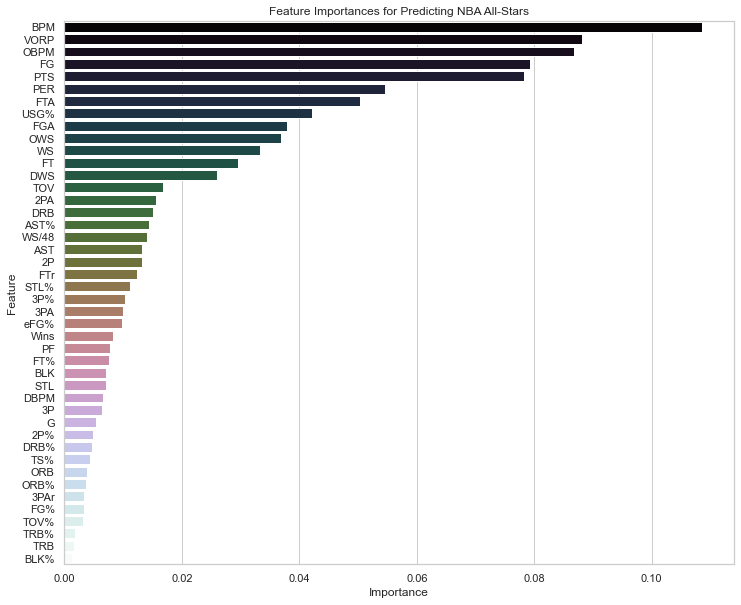

In [8]:
# Extracting feature importances from the model
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")
# Plotting all feature importances with a gradient color palette
plt.figure(figsize=(12, 10))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="cubehelix")
plt.title("Feature Importances for Predicting NBA All-Stars")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

